In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import warnings 

warnings.filterwarnings('ignore')

In [3]:
model=tf.keras.models.load_model('model_e100_filtered_1.h5')

In [4]:
import joblib

scl=joblib.load('scaler_e100_filtered_1.joblib')

In [5]:
df=pd.read_csv('MBS_2021_Total_Less_Than_36_DTI_Ratio.csv')
df.head(50)

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122237728,72021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,0.00,556.875000,237000.00,354
1,122237728,82021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.3,992.026070,0.00,556.875000,237000.00,353
2,122237728,92021,2,2.750,2.750,243000.0,236596.77,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,403.23,556.875000,237000.00,352
3,122237728,102021,2,2.750,2.750,243000.0,234446.08,360,12021,32021,...,0,0,5.3,2.5,6.2,992.026070,2150.69,556.875000,236596.77,351
4,122237728,112021,2,2.750,2.750,243000.0,233991.32,360,12021,32021,...,0,0,5.3,2.5,6.8,992.026070,454.76,556.875000,234446.08,350
5,122237728,122021,2,2.750,2.750,243000.0,233535.52,360,12021,32021,...,0,0,5.3,2.5,7.0,992.026070,455.80,556.875000,233991.32,349
6,122237728,12022,2,2.750,2.750,243000.0,233078.68,360,12021,32021,...,0,0,3.6,2.3,7.5,992.026070,456.84,556.875000,233535.52,348
7,126085681,12022,2,2.875,2.875,429000.0,424000.00,360,62021,82021,...,0,0,3.6,2.3,7.5,1779.888727,1000.00,1027.812500,425000.00,353
8,126085681,22022,2,2.875,2.875,429000.0,423549.30,360,62021,82021,...,0,0,3.6,2.3,7.9,1779.888727,450.70,1027.812500,424000.00,352
9,126085681,32022,2,2.875,2.875,429000.0,422784.78,360,62021,82021,...,0,0,3.6,2.3,8.5,1779.888727,764.52,1027.812500,423549.30,351


In [6]:
ic=[]

for i in range(len(df['Loan Identifier'])):
    r=df.iloc[i,4]/1200
    p=df.iloc[i,-2]

    ic.append(p*r)   


ic

[543.125,
 543.125,
 543.125,
 542.2009312499999,
 537.2722666666666,
 536.2301083333333,
 535.1855666666667,
 1018.2291666666666,
 1015.8333333333333,
 1014.7535312499999,
 1012.92186875,
 1011.0858218749999,
 1009.2453906249999,
 1007.4005510416665,
 288.75,
 288.75,
 287.93519791666665,
 287.3221541666667,
 286.7076895833333,
 286.0918270833333,
 285.47454375,
 511.965,
 511.965,
 510.16092892499995,
 508.444745175,
 508.444745175,
 507.58310257499994,
 506.71909282499996,
 885.8533333333332,
 883.05,
 883.05,
 881.3184650999999,
 879.8533870333333,
 878.3841880666665,
 876.9108681999999,
 412.5,
 412.5,
 412.941075,
 411.47935,
 411.47935,
 410.010325,
 410.010325,
 781.875,
 772.5,
 770.6608124999999,
 764.9890875,
 763.05673125,
 753.62075625,
 751.6670812499999,
 1323.4375000000002,
 1319.0625000000002,
 1315.521090625,
 1311.1765625,
 1306.822540625,
 1302.45898125,
 1298.085884375,
 559.8958333333333,
 558.9759375,
 558.9759375,
 558.0041666666666,
 557.0298437499999,
 556.052

In [7]:
df['Interest_Component']=ic
df

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122237728,72021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,0.00,543.125000,237000.00,354
1,122237728,82021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.3,992.026070,0.00,543.125000,237000.00,353
2,122237728,92021,2,2.750,2.750,243000.0,236596.77,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,403.23,543.125000,237000.00,352
3,122237728,102021,2,2.750,2.750,243000.0,234446.08,360,12021,32021,...,0,0,5.3,2.5,6.2,992.026070,2150.69,542.200931,236596.77,351
4,122237728,112021,2,2.750,2.750,243000.0,233991.32,360,12021,32021,...,0,0,5.3,2.5,6.8,992.026070,454.76,537.272267,234446.08,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,128202561,62022,2,3.125,3.125,133000.0,131196.53,360,92021,112021,...,0,0,3.6,2.3,9.1,569.739351,227.49,342.250052,131424.02,351
3370,128202561,72022,2,3.125,3.125,133000.0,130968.45,360,92021,112021,...,0,0,3.6,2.3,8.5,569.739351,228.08,341.657630,131196.53,350
3371,128202561,82022,2,3.125,3.125,133000.0,130739.77,360,92021,112021,...,0,0,3.6,2.3,8.3,569.739351,228.68,341.063672,130968.45,349
3372,128202561,92022,2,3.125,3.125,133000.0,130510.50,360,92021,112021,...,0,0,3.6,2.3,8.2,569.739351,229.27,340.468151,130739.77,348


In [8]:
# top_entries = pd.DataFrame(columns=df.columns)
# grouped = df.groupby('Loan Identifier')

# for loan_id, group in grouped:
#     top_7 = group.head(7)
    
#     top_entries = top_entries.append(top_7)

# # print(top_entries)
# df=top_entries

In [9]:
# df=df.drop(['PREPAYMENT_AMT'],axis=1)

In [10]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# and has columns 'LoanID' and 'Entry'

# Define a custom function to select the top 7 entries for each loan group
def select_top_entries(group):
    return group.head(7)

# Create a new DataFrame with the top 7 entries for each loan
top_entries = df.groupby('Loan Identifier').apply(select_top_entries)

# Reset the index of the resulting DataFrame
top_entries = top_entries.reset_index(drop=True)

# Print the resulting DataFrame with the top 7 entries for each loan
# print(top_entries)
df=top_entries
df


,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122237728,72021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,0.00,543.125000,237000.00,354
1,122237728,82021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.3,992.026070,0.00,543.125000,237000.00,353
2,122237728,92021,2,2.750,2.750,243000.0,236596.77,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,403.23,543.125000,237000.00,352
3,122237728,102021,2,2.750,2.750,243000.0,234446.08,360,12021,32021,...,0,0,5.3,2.5,6.2,992.026070,2150.69,542.200931,236596.77,351
4,122237728,112021,2,2.750,2.750,243000.0,233991.32,360,12021,32021,...,0,0,5.3,2.5,6.8,992.026070,454.76,537.272267,234446.08,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,128202561,62022,2,3.125,3.125,133000.0,131196.53,360,92021,112021,...,0,0,3.6,2.3,9.1,569.739351,227.49,342.250052,131424.02,351
3370,128202561,72022,2,3.125,3.125,133000.0,130968.45,360,92021,112021,...,0,0,3.6,2.3,8.5,569.739351,228.08,341.657630,131196.53,350
3371,128202561,82022,2,3.125,3.125,133000.0,130739.77,360,92021,112021,...,0,0,3.6,2.3,8.3,569.739351,228.68,341.063672,130968.45,349
3372,128202561,92022,2,3.125,3.125,133000.0,130510.50,360,92021,112021,...,0,0,3.6,2.3,8.2,569.739351,229.27,340.468151,130739.77,348


In [11]:
df.head(30)

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122237728,72021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,0.00,543.125000,237000.00,354
1,122237728,82021,2,2.750,2.750,243000.0,237000.00,360,12021,32021,...,0,0,5.3,2.5,5.3,992.026070,0.00,543.125000,237000.00,353
2,122237728,92021,2,2.750,2.750,243000.0,236596.77,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,403.23,543.125000,237000.00,352
3,122237728,102021,2,2.750,2.750,243000.0,234446.08,360,12021,32021,...,0,0,5.3,2.5,6.2,992.026070,2150.69,542.200931,236596.77,351
4,122237728,112021,2,2.750,2.750,243000.0,233991.32,360,12021,32021,...,0,0,5.3,2.5,6.8,992.026070,454.76,537.272267,234446.08,350
5,122237728,122021,2,2.750,2.750,243000.0,233535.52,360,12021,32021,...,0,0,5.3,2.5,7.0,992.026070,455.80,536.230108,233991.32,349
6,122237728,12022,2,2.750,2.750,243000.0,233078.68,360,12021,32021,...,0,0,3.6,2.3,7.5,992.026070,456.84,535.185567,233535.52,348
7,126085681,12022,2,2.875,2.875,429000.0,424000.00,360,62021,82021,...,0,0,3.6,2.3,7.5,1779.888727,1000.00,1018.229167,425000.00,353
8,126085681,22022,2,2.875,2.875,429000.0,423549.30,360,62021,82021,...,0,0,3.6,2.3,7.9,1779.888727,450.70,1015.833333,424000.00,352
9,126085681,32022,2,2.875,2.875,429000.0,422784.78,360,62021,82021,...,0,0,3.6,2.3,8.5,1779.888727,764.52,1014.753531,423549.30,351


In [12]:
test_pool=df.drop_duplicates(subset='Loan Identifier', keep ='first')
# test_pool=test_pool[0:1]
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122237728,72021,2,2.750,2.750,243000.0,237000.0,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,0.0,543.125000,237000.0,354
7,126085681,12022,2,2.875,2.875,429000.0,424000.0,360,62021,82021,...,0,0,3.6,2.3,7.5,1779.888727,1000.0,1018.229167,425000.0,353
14,123493802,92021,0,2.750,2.750,128000.0,126000.0,360,22021,42021,...,0,0,5.3,2.5,5.4,522.548712,0.0,288.750000,126000.0,353
21,127384226,32022,0,3.303,3.303,188000.0,186000.0,360,82021,102021,...,3,0,3.6,2.3,8.5,823.666447,0.0,511.965000,186000.0,353
28,124427596,112021,0,3.364,3.364,318000.0,315000.0,360,42021,72021,...,0,0,5.3,2.5,6.8,1403.930385,1000.0,885.853333,316000.0,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,122237568,72021,2,2.875,2.875,214000.0,212000.0,360,12021,32021,...,0,0,5.3,2.5,5.4,887.869901,0.0,507.916667,212000.0,354
3346,123493803,92021,0,2.500,2.500,293000.0,288000.0,240,32021,52021,...,3,0,5.3,2.5,5.4,1552.615477,0.0,600.000000,288000.0,234
3353,128394073,42022,0,2.000,2.000,539000.0,526000.0,180,92021,112021,...,3,0,3.6,2.3,8.3,3468.511896,0.0,876.666667,526000.0,173
3360,126978161,22022,2,2.750,2.750,368000.0,358000.0,360,72021,92021,...,0,0,3.6,2.3,7.9,1502.327546,1000.0,822.708333,359000.0,353


In [13]:
test_pool['Previous_UPB'].sum()

127942705.31

In [14]:
test_pool['Current Actual UPB'].sum()

127564276.7

In [15]:
test_pool['EMI'].sum()

638416.969908644

In [16]:
y=test_pool.groupby(['Loan Identifier'])['Current Actual UPB'].sum()
y

Loan Identifier
122128369    576000.0
122128387    575000.0
122128395    553000.0
122237505    466000.0
122237506    270000.0
               ...   
129753874    314000.0
129753896    114000.0
129753915    446000.0
129753938    141000.0
129753942    298000.0
Name: Current Actual UPB, Length: 482, dtype: float64

In [17]:
li4=list(df['Current Actual UPB'])
li4

[237000.0,
 237000.0,
 236596.77,
 234446.08,
 233991.32,
 233535.52,
 233078.68,
 424000.0,
 423549.3,
 422784.78,
 422018.43,
 421250.25,
 420480.23,
 419708.36,
 126000.0,
 125644.45,
 125376.94,
 125108.81,
 124840.07,
 124570.71,
 124300.73,
 186000.0,
 185344.57,
 184721.07,
 184721.07,
 184408.03,
 184094.13,
 183779.37,
 315000.0,
 315000.0,
 314382.33,
 313859.71,
 313335.62,
 312810.06,
 312283.03,
 165000.0,
 165176.43,
 164591.74,
 164591.74,
 164004.13,
 164004.13,
 163709.22,
 412000.0,
 411019.1,
 407994.18,
 406963.59,
 401931.07,
 400889.11,
 396845.2,
 603000.0,
 601381.07,
 599395.0,
 597404.59,
 595409.82,
 593410.69,
 591407.19,
 214646.76,
 214646.76,
 214273.6,
 213899.46,
 213524.35,
 213148.26,
 212771.01,
 158000.0,
 157000.0,
 155606.66,
 154376.5,
 153143.91,
 151908.88,
 150671.4,
 380000.0,
 379000.0,
 378705.47,
 378063.64,
 377420.07,
 376774.76,
 376127.7,
 156000.0,
 154316.17,
 153009.36,
 153009.36,
 150386.75,
 147996.3,
 146675.01,
 458000.0,
 4567

In [18]:
test_pool=test_pool[test_pool['Original UPB']!=test_pool['Current Actual UPB']]

In [19]:
test_pool

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122237728,72021,2,2.750,2.750,243000.0,237000.0,360,12021,32021,...,0,0,5.3,2.5,5.4,992.026070,0.0,543.125000,237000.0,354
7,126085681,12022,2,2.875,2.875,429000.0,424000.0,360,62021,82021,...,0,0,3.6,2.3,7.5,1779.888727,1000.0,1018.229167,425000.0,353
14,123493802,92021,0,2.750,2.750,128000.0,126000.0,360,22021,42021,...,0,0,5.3,2.5,5.4,522.548712,0.0,288.750000,126000.0,353
21,127384226,32022,0,3.303,3.303,188000.0,186000.0,360,82021,102021,...,3,0,3.6,2.3,8.5,823.666447,0.0,511.965000,186000.0,353
28,124427596,112021,0,3.364,3.364,318000.0,315000.0,360,42021,72021,...,0,0,5.3,2.5,6.8,1403.930385,1000.0,885.853333,316000.0,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,122237568,72021,2,2.875,2.875,214000.0,212000.0,360,12021,32021,...,0,0,5.3,2.5,5.4,887.869901,0.0,507.916667,212000.0,354
3346,123493803,92021,0,2.500,2.500,293000.0,288000.0,240,32021,52021,...,3,0,5.3,2.5,5.4,1552.615477,0.0,600.000000,288000.0,234
3353,128394073,42022,0,2.000,2.000,539000.0,526000.0,180,92021,112021,...,3,0,3.6,2.3,8.3,3468.511896,0.0,876.666667,526000.0,173
3360,126978161,22022,2,2.750,2.750,368000.0,358000.0,360,72021,92021,...,0,0,3.6,2.3,7.9,1502.327546,1000.0,822.708333,359000.0,353


In [20]:
test_pool=test_pool.drop_duplicates(subset=['Loan Identifier'],keep='first')
test_pool.columns

Index(['Loan Identifier', 'Monthly Reporting Period', 'Channel',
       'Original Interest Rate', 'Current Interest Rate', 'Original UPB',
       'Current Actual UPB', 'Original Loan Term', 'Origination Date',
       'First Payment Date', 'Remaining Months To Maturity',
       'Original Loan to Value Ratio (LTV)', 'Debt-To-Income (DTI)',
       'Borrower Credit Score at Origination',
       'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type',
       'Number of Units', 'Occupancy Status',
       'Metropolitan Statistical Area (MSA)', 'Zip Code Short',
       'Interest Only Loan Indicator', 'Current Loan Delinquency Status',
       'Modification Flag', 'Zero Balance Code', 'Special Eligibility Program',
       'Property Valuation Method', 'High Balance Loan Indicator',
       'Unemployment_rate', 'Divorce_rate', 'Inflation_rate', 'EMI',
       'UPB_diff', 'Interest_Component', 'Previous_UPB', 'Remaining MFM'],
      dtype='object')

In [21]:
test_pool.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity'], axis=1, inplace = True)
test_pool

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,72021,2,2.750,2.750,243000.0,237000.0,360,12021,32021,92,...,0.0,0.0,0,0,0,5.3,2.5,5.4,237000.0,354
7,12022,2,2.875,2.875,429000.0,424000.0,360,62021,82021,90,...,0.0,0.0,0,0,0,3.6,2.3,7.5,425000.0,353
14,92021,0,2.750,2.750,128000.0,126000.0,360,22021,42021,75,...,0.0,0.0,0,0,0,5.3,2.5,5.4,126000.0,353
21,32022,0,3.303,3.303,188000.0,186000.0,360,82021,102021,60,...,0.0,0.0,0,3,0,3.6,2.3,8.5,186000.0,353
28,112021,0,3.364,3.364,318000.0,315000.0,360,42021,72021,79,...,0.0,0.0,0,0,0,5.3,2.5,6.8,316000.0,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,72021,2,2.875,2.875,214000.0,212000.0,360,12021,32021,97,...,0.0,0.0,0,0,0,5.3,2.5,5.4,212000.0,354
3346,92021,0,2.500,2.500,293000.0,288000.0,240,32021,52021,72,...,0.0,0.0,0,3,0,5.3,2.5,5.4,288000.0,234
3353,42022,0,2.000,2.000,539000.0,526000.0,180,92021,112021,54,...,0.0,0.0,0,3,0,3.6,2.3,8.3,526000.0,173
3360,22022,2,2.750,2.750,368000.0,358000.0,360,72021,92021,72,...,0.0,0.0,0,0,0,3.6,2.3,7.9,359000.0,353


In [22]:
test_pool['Modification Flag']=test_pool['Modification Flag'].fillna(2)

In [23]:
test_pool.isnull().sum()

Monthly Reporting Period                0
Channel                                 0
Original Interest Rate                  0
Current Interest Rate                   0
Original UPB                            0
Current Actual UPB                      0
Original Loan Term                      0
Origination Date                        0
First Payment Date                      0
Original Loan to Value Ratio (LTV)      0
Debt-To-Income (DTI)                    0
Borrower Credit Score at Origination    0
First Time Home Buyer Indicator         0
Loan Purpose                            0
Property Type                           0
Number of Units                         0
Occupancy Status                        0
Metropolitan Statistical Area (MSA)     0
Zip Code Short                          0
Interest Only Loan Indicator            0
Current Loan Delinquency Status         0
Modification Flag                       0
Zero Balance Code                       0
Special Eligibility Program       

In [24]:
X_test_pool=test_pool.drop(['Current Actual UPB'],axis=1)

In [25]:
X_test_pool2=X_test_pool

In [26]:
y_test_pool=test_pool['Current Actual UPB']

In [27]:
def scale(value, att_index):
    scaled = (value - scl.mean_[att_index])/ scl.scale_[att_index]
    return scaled

In [28]:
def update(mrp):
    if((mrp//10000)==12):
        mrp = mrp - 110000 + 1
    else:
        mrp += 10000
    return mrp

In [29]:
Unemploy={"2000":4.0,
     "2001":4.7,
     "2002":5.8,
     "2003":6.0,
     "2004":5.5,
     "2005":5.1,
     "2006":4.6,
     "2007":4.6,
     "2008":5.8,
     "2009":9.3,
     "2010":9.6,
     "2011":8.9,
     "2012":8.1,
     "2013":7.4,
     "2014":6.2,
     "2015":5.3,
     "2016":4.9,
     "2017":4.4,
     "2018":3.9,
     "2019":3.7,
     "2020":8.1,
     "2021":5.3,
     "2022":3.6,
     "2023":3.4
     }

In [30]:
divorce={"2000":4.0,
     "2001":4.0,
     "2002":3.9,
     "2003":3.8,
     "2004":3.7,
     "2005":3.6,
     "2006":3.7,
     "2007":3.6,
     "2008":3.5,
     "2009":3.5,
     "2010":3.6,
     "2011":3.6,
     "2012":3.4,
     "2013":3.3,
     "2014":3.2,
     "2015":3.1,
     "2016":3.0,
     "2017":2.9,
     "2018":2.9,
     "2019":2.7,
     "2020":2.3,
     "2021":2.5,
     "2022":2.3,
     "2023":2.3
     }

In [31]:
inflation_data = {
    "12022": 7.5,
    "22022": 7.9,
    "32022": 8.5,
    "42022": 8.3,
    "52022": 8.6,
    "62022": 9.1,
    "72022": 8.5,
    "82022": 8.3,
    "92022": 8.2,
    "102022": 7.7,
    "112022": 7.1,
    "122022": 6.5,
    "12021": 1.4,
    "22021": 1.7,
    "32021": 2.6,
    "42021": 4.2,
    "52021": 5.0,
    "62021": 5.4,
    "72021": 5.4,
    "82021": 5.3,
    "92021": 5.4,
    "102021": 6.2,
    "112021": 6.8,
    "122021": 7.0,
    "12020": 2.5,
    "22020": 2.3,
    "32020": 1.5,
    "42020": 0.3,
    "52020": 0.1,
    "62020": 0.6,
    "72020": 1.0,
    "82020": 1.3,
    "92020": 1.4,
    "102020": 1.2,
    "112020": 1.2,
    "122020": 1.4,
    "12019": 1.6,
    "22019": 1.5,
    "32019": 1.9,
    "42019": 2.0,
    "52019": 1.8,
    "62019": 1.6,
    "72019": 1.8,
    "82019": 1.7,
    "92019": 1.7,
    "102019": 1.8,
    "112019": 2.1,
    "122019": 2.3,
    "12018": 2.1,
    "22018": 2.2,
    "32018": 2.4,
    "42018": 2.5,
    "52018": 2.8,
    "62018": 2.9,
    "72018": 2.9,
    "82018": 2.7,
    "92018": 2.3,
    "102018": 2.5,
    "112018": 2.2,
    "122018": 1.9,
    "12017": 2.5,
    "22017": 2.7,
    "32017": 2.4,
    "42017": 2.2,
    "52017": 1.9,
    "62017": 1.6,
    "72017": 1.7,
    "82017": 1.9,
    "92017": 2.2,
    "102017": 2.0,
    "112017": 2.2,
    "122017": 2.1,
    "12016": 1.4,
    "22016": 1.0,
    "32016": 0.9,
    "42016": 1.1,
    "52016": 1.0,
    "62016": 1.0,
    "72016": 0.8,
    "82016": 1.1,
    "92016": 1.5,
    "102016": 1.6,
    "112016": 1.7,
    "122016": 2.1,
    "12015": -0.1,
    "22015": 0.0,
    "32015": -0.1,
    "42015": -0.2,
    "52015": 0.0,
    "62015": 0.1,
    "72015": 0.2,
    "82015": 0.2,
    "92015": 0.0,
    "102015": 0.2,
    "112015": 0.5,
    "122015": 0.7,
    "12014": 1.6,
    "22014": 1.1,
    "32014": 1.5,
    "42014": 2.0,
    "52014": 2.1,
    "62014": 2.1,
    "72014": 2.0,
    "82014": 1.7,
    "92014": 1.7,
    "102014": 1.7,
    "112014": 1.3,
    "122014": 0.8,
    "12013": 1.6,
    "22013": 2.0,
    "32013": 1.5,
    "42013": 1.1,
    "52013": 1.4,
    "62013": 1.8,
    "72013": 2.0,
    "82013": 1.5,
    "92013": 1.2,
    "102013": 1.0,
    "112013": 1.2,
    "122013": 1.5,
    "12012": 2.9,
    "22012": 2.9,
    "32012": 2.7,
    "42012": 2.3,
    "52012": 1.7,
    "62012": 1.7,
    "72012": 1.4,
    "82012": 1.7,
    "92012": 2.0,
    "102012": 2.2,
    "112012": 1.8,
    "122012": 1.7,
    "12011": 1.6,
    "22011": 2.1,
    "32011": 2.7,
    "42011": 3.2,
    "52011": 3.6,
    "62011": 3.6,
    "72011": 3.6,
    "82011": 3.8,
    "92011": 3.9,
    "102011": 3.5,
    "112011": 3.4,
    "122011": 3.0,
    "12010": 2.6,
    "22010": 2.1,
    "32010": 2.3,
    "42010": 2.2,
    "52010": 2.0,
    "62010": 1.1,
    "72010": 1.2,
    "82010": 1.1,
    "92010": 1.1,
    "102010": 1.2,
    "112010": 1.1,
    "122010": 1.5,
    "12009": 0.0,
    "22009": 0.2,
    "32009": -0.4,
    "42009": -0.7,
    "52009": -1.3,
    "62009": -1.4,
    "72009": -2.1,
    "82009": -1.5,
    "92009": -1.3,
    "102009": -0.2,
    "112009": 1.8,
    "122009": 2.7,
    "12008": 4.3,
    "22008": 4.0,
    "32008": 4.0,
    "42008": 3.9,
    "52008": 4.2,
    "62008": 5.0,
    "72008": 5.6,
    "82008": 5.4,
    "92008": 4.9,
    "102008": 3.7,
    "112008": 1.1,
    "122008": 0.1,
    "12007": 2.1,
    "22007": 2.4,
    "32007": 2.8,
    "42007": 2.6,
    "52007": 2.7,
    "62007": 2.7,
    "72007": 2.4,
    "82007": 2.0,
    "92007": 2.8,
    "102007": 3.5,
    "112007": 4.3,
    "122007": 4.1,
    "12006": 4.0,
    "22006": 3.6,
    "32006": 3.4,
    "42006": 3.5,
    "52006": 4.2,
    "62006": 4.3,
    "72006": 4.1,
    "82006": 3.8,
    "92006": 2.1,
    "102006": 1.3,
    "112006": 2.0,
    "122006": 2.5,
    "12005": 3.0,
    "22005": 3.0,
    "32005": 3.1,
    "42005": 3.5,
    "52005": 2.8,
    "62005": 2.5,
    "72005": 3.2,
    "82005": 3.6,
    "92005": 4.7,
    "102005": 4.3,
    "112005": 3.5,
    "122005": 3.4,
    "12004": 1.9,
    "22004": 1.7,
    "32004": 1.7,
    "42004": 2.3,
    "52004": 3.1,
    "62004": 3.3,
    "72004": 3.0,
    "82004": 2.7,
    "92004": 2.5,
    "102004": 3.2,
    "112004": 3.5,
    "122004": 3.3,
    "12003": 2.6, 
    "22003": 3.0, 
    "32003": 3.0, 
    "42003": 2.2, 
    "52003": 2.1, 
    "62003": 2.1,
    "72003": 2.1, 
    "82003": 2.2, 
    "92003": 2.3, 
    "102003": 2.0, 
    "112003": 1.8, 
    "122003": 1.9,
    "12002": 1.1, 
    "22002": 1.1, 
    "32002": 1.5, 
    "42002": 1.6, 
    "52002": 1.2, 
    "62002": 1.1,
    "72002": 1.5, 
    "82002": 1.8, 
    "92002": 1.5, 
    "102002": 2.0, 
    "112002": 2.2, 
    "122002": 2.4,
    "12001": 3.7, 
    "22001": 3.5, 
    "32001": 2.9, 
    "42001": 3.3, 
    "52001": 3.6, 
    "62001": 3.2,
    "72001": 2.7, 
    "82001": 2.7, 
    "92001": 2.6, 
    "102001": 2.1, 
    "112001": 1.9, 
    "122001": 1.6,
    "12000": 2.7, 
    "22000": 3.2, 
    "32000": 3.8, 
    "42000": 3.1, 
    "52000": 3.2, 
    "62000": 3.7,
    "72000": 3.7, 
    "82000": 3.4, 
    "92000": 3.5, 
    "102000": 3.4, 
    "112000": 3.4, 
    "122000": 3.4,
    "12023": 6.4,
    "22023": 6.0,
    "32023": 5.0,
    "42023": 4.9
}

In [32]:
li2=[]
pc_cupb=[]

def dnn_forecast(test_pool): 
    for i in range(len(test_pool)):
        testing_x=test_pool[i:i+1]
        test_unscaled=testing_x
        testing_x=scl.transform(testing_x)

        fore=[]

        p=testing_x[0]
        # pre=p[28]
        single_entry = np.expand_dims(p, axis=0)

        for j in range(7):     
            g=model.predict(single_entry)

            # g[0][0]=g[0][0]-(296)*(j+1)
            # g[0][0]=g[0][0]*(np.exp(-0.001))

            fore.append(g[0][0])

            cal_upb=float(df['EMI'][i*7+j])-(g[0][0])*(float(test_unscaled['Current Interest Rate']))/1200
            pc_cupb.append(cal_upb)
            

            test_unscaled['Previous_UPB']=g[0][0]
            test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
            k=str(int(test_unscaled['Monthly Reporting Period']))
            k=k[::-1]
            r=k[:4]

            r=r[::-1]
            # print(r)

            if(k=="52023"):
                print("done")
                break
            
            test_unscaled['Unemployment_rate']=Unemploy[r]
            test_unscaled['Divorce_rate']=divorce[r]
            test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
            test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

            test_scaled=(scl.transform(test_unscaled))[0]
            single_entry = np.expand_dims(test_scaled, axis=0)

        li2.append(fore)

In [33]:
dnn_forecast(X_test_pool)

1/1 [==============================] - 0s 27ms/step


In [34]:
pc_cupb

[450.06047412408816,
 451.2271473011715,
 452.4054936553382,
 453.61098193658813,
 454.83942269179647,
 456.0822221709632,
 457.2811935251299,
 763.3076687137442,
 764.9699278283275,
 766.6474603804108,
 768.3357741824941,
 770.0380137658275,
 771.7553770470774,
 773.4815000939525,
 234.27405347540707,
 234.75433667853207,
 235.23866610561538,
 235.72517977749038,
 236.15214592332376,
 236.5816364832196,
 237.01460035040708,
 312.51992860164177,
 313.3410337578918,
 314.16734285945427,
 314.99988809382927,
 315.8332074688293,
 316.6693653594543,
 317.5088778594543,
 519.5842812998781,
 521.1034251540447,
 522.547755049878,
 524.0039115082113,
 525.473383799878,
 526.9507404665446,
 528.4398360915446,
 292.37342382819156,
 293.17096289069156,
 293.97385351569153,
 294.78307226569154,
 295.59342382819153,
 296.40967382819156,
 297.23576757819154,
 844.2444112289973,
 845.8291963852473,
 847.4264620102473,
 849.0395479477472,
 850.6676338852473,
 852.3090791977472,
 853.9046456039972,
 19

In [35]:
li2
pred_list_upb= li2

In [36]:
li2

[[236494.08, 235984.98, 235470.8, 234944.77, 234408.72, 233866.4, 233343.22],
 [424312.1, 423618.28, 422918.1, 422213.4, 421502.9, 420786.1, 420065.62],
 [125792.58, 125583.0, 125371.66, 125159.36, 124973.05, 124785.63, 124596.7],
 [185702.64, 185404.33, 185104.12, 184801.66, 184498.9, 184195.12, 183890.12],
 [315462.34, 314920.44, 314405.22, 313885.78, 313361.6, 312834.6, 312303.4],
 [164682.12, 164363.11, 164041.95, 163718.27, 163394.12, 163067.62, 162737.19],
 [416160.8, 415315.6, 414463.72, 413603.4, 412735.1, 411859.66, 411008.7],
 [602943.8, 600876.06, 598809.9, 596740.44, 594666.44, 592592.75, 590520.44],
 [214597.94, 214192.27, 213783.73, 213399.61, 213012.47, 212621.89, 212229.39],
 [157724.03, 156436.64, 155137.89, 153855.7, 152557.75, 151243.12, 149913.69],
 [380382.66, 379760.1, 379131.78, 378499.66, 377862.38, 377219.53, 376573.7],
 [156624.66, 155232.89, 153825.27, 152404.47, 150969.4, 149518.11, 148054.33],
 [458156.22, 457307.66, 456453.2, 455592.47, 454726.53, 453855.4

In [37]:
test_pool

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,72021,2,2.750,2.750,243000.0,237000.0,360,12021,32021,92,...,0.0,0.0,0,0,0,5.3,2.5,5.4,237000.0,354
7,12022,2,2.875,2.875,429000.0,424000.0,360,62021,82021,90,...,0.0,0.0,0,0,0,3.6,2.3,7.5,425000.0,353
14,92021,0,2.750,2.750,128000.0,126000.0,360,22021,42021,75,...,0.0,0.0,0,0,0,5.3,2.5,5.4,126000.0,353
21,32022,0,3.303,3.303,188000.0,186000.0,360,82021,102021,60,...,0.0,0.0,0,3,0,3.6,2.3,8.5,186000.0,353
28,112021,0,3.364,3.364,318000.0,315000.0,360,42021,72021,79,...,0.0,0.0,0,0,0,5.3,2.5,6.8,316000.0,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,72021,2,2.875,2.875,214000.0,212000.0,360,12021,32021,97,...,0.0,0.0,0,0,0,5.3,2.5,5.4,212000.0,354
3346,92021,0,2.500,2.500,293000.0,288000.0,240,32021,52021,72,...,0.0,0.0,0,3,0,5.3,2.5,5.4,288000.0,234
3353,42022,0,2.000,2.000,539000.0,526000.0,180,92021,112021,54,...,0.0,0.0,0,3,0,3.6,2.3,8.3,526000.0,173
3360,22022,2,2.750,2.750,368000.0,358000.0,360,72021,92021,72,...,0.0,0.0,0,0,0,3.6,2.3,7.9,359000.0,353


In [38]:
df[14:21]

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
14,123493802,92021,0,2.75,2.75,128000.0,126000.00,360,22021,42021,...,0,0,5.3,2.5,5.4,522.548712,0.00,288.750000,126000.00,353
15,123493802,102021,0,2.75,2.75,128000.0,125644.45,360,22021,42021,...,0,0,5.3,2.5,6.2,522.548712,355.55,288.750000,126000.00,352
16,123493802,112021,0,2.75,2.75,128000.0,125376.94,360,22021,42021,...,0,0,5.3,2.5,6.8,522.548712,267.51,287.935198,125644.45,351
17,123493802,122021,0,2.75,2.75,128000.0,125108.81,360,22021,42021,...,0,0,5.3,2.5,7.0,522.548712,268.13,287.322154,125376.94,350
18,123493802,12022,0,2.75,2.75,128000.0,124840.07,360,22021,42021,...,0,0,3.6,2.3,7.5,522.548712,268.74,286.707690,125108.81,349
19,123493802,22022,0,2.75,2.75,128000.0,124570.71,360,22021,42021,...,0,0,3.6,2.3,7.9,522.548712,269.36,286.091827,124840.07,348
20,123493802,32022,0,2.75,2.75,128000.0,124300.73,360,22021,42021,...,0,0,3.6,2.3,8.5,522.548712,269.98,285.474544,124570.71,347


In [39]:
for i in li2:
    for j in range(len(i)-1):
        print(i[j]-i[j+1])

    print('\n')

509.09375
514.1875
526.03125
536.0469
542.3125
523.1875


693.8125
700.1875
704.6875
710.5
716.8125
720.46875


209.57812
211.34375
212.29688
186.3125
187.41406
188.92969


298.3125
300.20312
302.46875
302.75
303.78125
305.0


541.90625
515.21875
519.4375
524.1875
527.0
531.1875


319.01562
321.15625
323.6875
324.14062
326.5
330.4375


845.21875
851.875
860.3125
868.3125
875.4375
850.96875


2067.75
2066.1875
2069.4375
2074.0
2073.6875
2072.3125


405.67188
408.53125
384.125
387.14062
390.57812
392.5


1287.3906
1298.75
1282.1875
1297.9531
1314.625
1329.4375


622.5625
628.3125
632.125
637.28125
642.84375
645.84375


1391.7656
1407.625
1420.7969
1435.0625
1451.2969
1463.7812


848.5625
854.46875
860.71875
865.9375
871.0625
876.125


1199.1719
1202.9844
1207.2188
1195.3906
1199.3281
1203.1875


1241.6875
1248.375
1256.2188
1264.4375
1271.625
1278.625


1673.75
1686.5
1699.1562
1711.9062
1725.25
1738.875


403.48438
407.10938
409.96875
385.59375
388.625
392.07812


1215.25
1216.25
1200.1

In [40]:
actual_list_upb=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,6])

    actual_list_upb.append(act_list_1)

actual_list_upb

[[237000.0, 237000.0, 236596.77, 234446.08, 233991.32, 233535.52, 233078.68],
 [424000.0, 423549.3, 422784.78, 422018.43, 421250.25, 420480.23, 419708.36],
 [126000.0, 125644.45, 125376.94, 125108.81, 124840.07, 124570.71, 124300.73],
 [186000.0, 185344.57, 184721.07, 184721.07, 184408.03, 184094.13, 183779.37],
 [315000.0, 315000.0, 314382.33, 313859.71, 313335.62, 312810.06, 312283.03],
 [165000.0, 165176.43, 164591.74, 164591.74, 164004.13, 164004.13, 163709.22],
 [412000.0, 411019.1, 407994.18, 406963.59, 401931.07, 400889.11, 396845.2],
 [603000.0, 601381.07, 599395.0, 597404.59, 595409.82, 593410.69, 591407.19],
 [214646.76, 214646.76, 214273.6, 213899.46, 213524.35, 213148.26, 212771.01],
 [158000.0, 157000.0, 155606.66, 154376.5, 153143.91, 151908.88, 150671.4],
 [380000.0, 379000.0, 378705.47, 378063.64, 377420.07, 376774.76, 376127.7],
 [156000.0, 154316.17, 153009.36, 153009.36, 150386.75, 147996.3, 146675.01],
 [458000.0, 456766.13, 454880.76, 453821.25, 453821.25, 452759.2

In [41]:
actual_list_pc=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,-5]-df.iloc[7*i+j,-3])

    actual_list_pc.append(act_list_1)

actual_list_pc

[[448.9010698272132,
  448.9010698272132,
  448.9010698272132,
  449.82513857721324,
  454.75380316054657,
  455.7959614938799,
  456.8405031605465],
 [761.6595599897859,
  764.0553933231192,
  765.1351954064526,
  766.9668579064524,
  768.8029047814526,
  770.6433360314526,
  772.488175614786],
 [233.79871167853207,
  233.79871167853207,
  234.61351376186542,
  235.2265575118654,
  235.84102209519875,
  236.45688459519874,
  237.07416792853206],
 [311.7014469219543,
  311.7014469219543,
  313.5055179969543,
  315.2217017469543,
  315.2217017469543,
  316.08334434695433,
  316.9473540969543],
 [518.077051612378,
  520.8803849457113,
  520.8803849457113,
  522.6119198457113,
  524.0769979123779,
  525.5461968790447,
  527.0195167457114],
 [291.57873632819155,
  291.57873632819155,
  291.13766132819154,
  292.59938632819154,
  292.59938632819154,
  294.06841132819153,
  294.06841132819153],
 [842.6709346664973,
  852.0459346664973,
  853.8851221664974,
  859.5568471664973,
  861.48920341

In [42]:
actual_list_pupb=[]

for i in range(len(test_pool['Current Actual UPB'])):
    act_list_1=[]

    for j in range(7):
        act_list_1.append(df.iloc[7*i+j,-2])

    actual_list_pupb.append(act_list_1)

actual_list_pupb

[[237000.0, 237000.0, 237000.0, 236596.77, 234446.08, 233991.32, 233535.52],
 [425000.0, 424000.0, 423549.3, 422784.78, 422018.43, 421250.25, 420480.23],
 [126000.0, 126000.0, 125644.45, 125376.94, 125108.81, 124840.07, 124570.71],
 [186000.0, 186000.0, 185344.57, 184721.07, 184721.07, 184408.03, 184094.13],
 [316000.0, 315000.0, 315000.0, 314382.33, 313859.71, 313335.62, 312810.06],
 [165000.0, 165000.0, 165176.43, 164591.74, 164591.74, 164004.13, 164004.13],
 [417000.0, 412000.0, 411019.1, 407994.18, 406963.59, 401931.07, 400889.11],
 [605000.0, 603000.0, 601381.07, 599395.0, 597404.59, 595409.82, 593410.69],
 [215000.0, 214646.76, 214646.76, 214273.6, 213899.46, 213524.35, 213148.26],
 [159000.0, 158000.0, 157000.0, 155606.66, 154376.5, 153143.91, 151908.88],
 [381000.0, 380000.0, 379000.0, 378705.47, 378063.64, 377420.07, 376774.76],
 [158000.0, 156000.0, 154316.17, 153009.36, 153009.36, 150386.75, 147996.3],
 [459000.0, 458000.0, 456766.13, 454880.76, 453821.25, 453821.25, 452759.

In [43]:
actual_list_smm=[]

for i in range(len(test_pool['Current Actual UPB'])):
    list_smm=[]

    for j in range(7):
        
        list_smm.append((actual_list_pupb[i][j]-actual_list_upb[i][j]-actual_list_pc[i][j])/actual_list_upb[i][j])

    actual_list_smm.append(list_smm)

actual_list_smm

[[-0.0018940973410430935,
  -0.0018940973410430935,
  -0.00019303336147489546,
  0.007254823204648118,
  2.6483202170242036e-08,
  1.729289890287374e-08,
  -2.1587583643890623e-09],
 [0.0005621236792693729,
  -0.0007398321596166199,
  -1.45510301125823e-06,
  -1.4616847572688281e-06,
  -1.4787048350941613e-06,
  -1.4824383810719251e-06,
  -1.472869434363018e-06],
 [-0.0018555453307820006,
  0.0009690144556442473,
  0.0002623806757297581,
  0.00026299860487953857,
  0.00026352899277284875,
  0.0002641320371763301,
  0.0002647275850389488],
 [-0.001675814230763195,
  0.001854538026541801,
  0.0016781760846396442,
  -0.0017064739920949693,
  -1.1830839182795599e-05,
  -1.1859934626705125e-05,
  -1.1902065487247021e-05],
 [0.0015299141218654666,
  -0.0016535885236371786,
  0.0003078723128436398,
  2.574447763306834e-08,
  4.149572157704876e-08,
  4.4126205381493214e-08,
  3.356972121847553e-08],
 [-0.0017671438565344943,
  -0.0028333869204473336,
  0.0017835180469676717,
  -0.0017777282525

In [44]:
actual_list_smm_wa=[]

for i in range(7):
    act_smm_sum=0
    upb_sum = 0 
    for j in range(len(test_pool['Current Actual UPB'])):
        act_smm_sum+=actual_list_smm[j][i]*actual_list_upb[j][i]
        upb_sum += actual_list_upb[j][i]
    actual_list_smm_wa.append(act_smm_sum/upb_sum)
actual_list_smm_wa

[0.00032532859326452746,
 0.0010072021842768071,
 0.0006860914006472187,
 0.00034849325881702284,
 0.0004576660692719993,
 0.00048105380093113105,
 nan]

In [45]:
pred_list_upb

[[236494.08, 235984.98, 235470.8, 234944.77, 234408.72, 233866.4, 233343.22],
 [424312.1, 423618.28, 422918.1, 422213.4, 421502.9, 420786.1, 420065.62],
 [125792.58, 125583.0, 125371.66, 125159.36, 124973.05, 124785.63, 124596.7],
 [185702.64, 185404.33, 185104.12, 184801.66, 184498.9, 184195.12, 183890.12],
 [315462.34, 314920.44, 314405.22, 313885.78, 313361.6, 312834.6, 312303.4],
 [164682.12, 164363.11, 164041.95, 163718.27, 163394.12, 163067.62, 162737.19],
 [416160.8, 415315.6, 414463.72, 413603.4, 412735.1, 411859.66, 411008.7],
 [602943.8, 600876.06, 598809.9, 596740.44, 594666.44, 592592.75, 590520.44],
 [214597.94, 214192.27, 213783.73, 213399.61, 213012.47, 212621.89, 212229.39],
 [157724.03, 156436.64, 155137.89, 153855.7, 152557.75, 151243.12, 149913.69],
 [380382.66, 379760.1, 379131.78, 378499.66, 377862.38, 377219.53, 376573.7],
 [156624.66, 155232.89, 153825.27, 152404.47, 150969.4, 149518.11, 148054.33],
 [458156.22, 457307.66, 456453.2, 455592.47, 454726.53, 453855.4

In [46]:
pred_list_pupb = []
for i in range(len(test_pool['Current Actual UPB'])):
    temp_list = []
    for j in range(7):
        if(j==0):
            temp_list.append(actual_list_pupb[i][0])
        else:
            temp_list.append(pred_list_upb[i][j-1])
    pred_list_pupb.append(temp_list)
pred_list_pupb
    

[[237000.0, 236494.08, 235984.98, 235470.8, 234944.77, 234408.72, 233866.4],
 [425000.0, 424312.1, 423618.28, 422918.1, 422213.4, 421502.9, 420786.1],
 [126000.0, 125792.58, 125583.0, 125371.66, 125159.36, 124973.05, 124785.63],
 [186000.0, 185702.64, 185404.33, 185104.12, 184801.66, 184498.9, 184195.12],
 [316000.0, 315462.34, 314920.44, 314405.22, 313885.78, 313361.6, 312834.6],
 [165000.0, 164682.12, 164363.11, 164041.95, 163718.27, 163394.12, 163067.62],
 [417000.0, 416160.8, 415315.6, 414463.72, 413603.4, 412735.1, 411859.66],
 [605000.0, 602943.8, 600876.06, 598809.9, 596740.44, 594666.44, 592592.75],
 [215000.0, 214597.94, 214192.27, 213783.73, 213399.61, 213012.47, 212621.89],
 [159000.0, 157724.03, 156436.64, 155137.89, 153855.7, 152557.75, 151243.12],
 [381000.0, 380382.66, 379760.1, 379131.78, 378499.66, 377862.38, 377219.53],
 [158000.0, 156624.66, 155232.89, 153825.27, 152404.47, 150969.4, 149518.11],
 [459000.0, 458156.22, 457307.66, 456453.2, 455592.47, 454726.53, 453855

In [47]:
pred_list_pc=[]
for i in range(len(test_pool['Current Actual UPB'])):
    temp_list = []
    for j in range(7):
        temp_list.append(pc_cupb[i*7+j])
    pred_list_pc.append(temp_list)

pred_list_pc

[[450.06047412408816,
  451.2271473011715,
  452.4054936553382,
  453.61098193658813,
  454.83942269179647,
  456.0822221709632,
  457.2811935251299],
 [763.3076687137442,
  764.9699278283275,
  766.6474603804108,
  768.3357741824941,
  770.0380137658275,
  771.7553770470774,
  773.4815000939525],
 [234.27405347540707,
  234.75433667853207,
  235.23866610561538,
  235.72517977749038,
  236.15214592332376,
  236.5816364832196,
  237.01460035040708],
 [312.51992860164177,
  313.3410337578918,
  314.16734285945427,
  314.99988809382927,
  315.8332074688293,
  316.6693653594543,
  317.5088778594543],
 [519.5842812998781,
  521.1034251540447,
  522.547755049878,
  524.0039115082113,
  525.473383799878,
  526.9507404665446,
  528.4398360915446],
 [292.37342382819156,
  293.17096289069156,
  293.97385351569153,
  294.78307226569154,
  295.59342382819153,
  296.40967382819156,
  297.23576757819154],
 [844.2444112289973,
  845.8291963852473,
  847.4264620102473,
  849.0395479477472,
  850.66763

In [48]:
predicted_list_smm=[]

for i in range(len(test_pool['Current Actual UPB'])):
    list_smm=[]

    for j in range(7):
        list_smm.append((pred_list_pupb[i][j]-pred_list_upb[i][j]-pred_list_pc[i][j])/pred_list_upb[i][j])

    predicted_list_smm.append(list_smm)

predicted_list_smm

[[0.00023620634105851076,
  0.0002452130708743468,
  0.0002623765119266949,
  0.00030824380305200454,
  0.0003464352893580394,
  0.00036871596571616116,
  0.0002824436331508782],
 [-0.0001777027330221935,
  -0.00016797534709398832,
  -0.00015714617407619686,
  -0.00015074906016794464,
  -0.00014125172776510952,
  -0.00013057198862593695,
  -0.00012620111463286835],
 [-0.00021346393305274403,
  -0.00020047467952296146,
  -0.00019059264925053886,
  -0.00018718779717699703,
  -0.000398803159317818,
  -0.0003940163052031611,
  -0.00038592443976761187],
 [-8.163886927303496e-05,
  -8.105816034542374e-05,
  -7.543979832677562e-05,
  -6.780858109235301e-05,
  -7.091211397807027e-05,
  -6.996990479229173e-05,
  -6.802365194680403e-05],
 [5.7287245397643255e-05,
  6.605739853246375e-05,
  -2.331069782816063e-05,
  -1.454800370385153e-05,
  -4.103514360167116e-06,
  1.5746191258737612e-07,
  8.798059366204448e-06],
 [0.0001548533343968475,
  0.00015724125813623403,
  0.00016570393101571692,
  0.

In [49]:
sum_list=[]
count = 0
for j in range (7):
    sum = 0
    for i in range(len(test_pool['Current Actual UPB'])):
        sum = sum + li2[i][count]
    sum_list.append(sum)
    count   += 1

print(sum_list)

[127435192.14453125, 127076336.22265625, 126715946.56835938, 126355411.265625, 125993411.3046875, 125629527.50390625, 125265431.37109375]


In [50]:
currentupb = list(df['Current Actual UPB'])
monthly_cupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentupb), 7):
        sum+=currentupb[i]
    monthly_cupb.append(sum)
    start+=1

monthly_cupb

[127564276.7,
 127097648.94999994,
 126671584.64,
 126287313.93000014,
 125888633.47999997,
 125486331.55999993,
 124460292.25999998]

In [51]:
predicted_list_smm

[[0.00023620634105851076,
  0.0002452130708743468,
  0.0002623765119266949,
  0.00030824380305200454,
  0.0003464352893580394,
  0.00036871596571616116,
  0.0002824436331508782],
 [-0.0001777027330221935,
  -0.00016797534709398832,
  -0.00015714617407619686,
  -0.00015074906016794464,
  -0.00014125172776510952,
  -0.00013057198862593695,
  -0.00012620111463286835],
 [-0.00021346393305274403,
  -0.00020047467952296146,
  -0.00019059264925053886,
  -0.00018718779717699703,
  -0.000398803159317818,
  -0.0003940163052031611,
  -0.00038592443976761187],
 [-8.163886927303496e-05,
  -8.105816034542374e-05,
  -7.543979832677562e-05,
  -6.780858109235301e-05,
  -7.091211397807027e-05,
  -6.996990479229173e-05,
  -6.802365194680403e-05],
 [5.7287245397643255e-05,
  6.605739853246375e-05,
  -2.331069782816063e-05,
  -1.454800370385153e-05,
  -4.103514360167116e-06,
  1.5746191258737612e-07,
  8.798059366204448e-06],
 [0.0001548533343968475,
  0.00015724125813623403,
  0.00016570393101571692,
  0.

In [52]:
actual_list_smm

[[-0.0018940973410430935,
  -0.0018940973410430935,
  -0.00019303336147489546,
  0.007254823204648118,
  2.6483202170242036e-08,
  1.729289890287374e-08,
  -2.1587583643890623e-09],
 [0.0005621236792693729,
  -0.0007398321596166199,
  -1.45510301125823e-06,
  -1.4616847572688281e-06,
  -1.4787048350941613e-06,
  -1.4824383810719251e-06,
  -1.472869434363018e-06],
 [-0.0018555453307820006,
  0.0009690144556442473,
  0.0002623806757297581,
  0.00026299860487953857,
  0.00026352899277284875,
  0.0002641320371763301,
  0.0002647275850389488],
 [-0.001675814230763195,
  0.001854538026541801,
  0.0016781760846396442,
  -0.0017064739920949693,
  -1.1830839182795599e-05,
  -1.1859934626705125e-05,
  -1.1902065487247021e-05],
 [0.0015299141218654666,
  -0.0016535885236371786,
  0.0003078723128436398,
  2.574447763306834e-08,
  4.149572157704876e-08,
  4.4126205381493214e-08,
  3.356972121847553e-08],
 [-0.0017671438565344943,
  -0.0028333869204473336,
  0.0017835180469676717,
  -0.0017777282525

In [53]:
previousupb = list(df['Previous_UPB'])
monthly_pupb = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(previousupb), 7):
        sum+=previousupb[i]
    monthly_pupb.append(sum)
    start+=1

monthly_pupb

[127942705.31,
 127564276.7,
 127097648.94999994,
 126671584.64,
 126287313.93000014,
 125888633.47999997,
 125486331.55999993]

In [54]:
pc_cupb

[450.06047412408816,
 451.2271473011715,
 452.4054936553382,
 453.61098193658813,
 454.83942269179647,
 456.0822221709632,
 457.2811935251299,
 763.3076687137442,
 764.9699278283275,
 766.6474603804108,
 768.3357741824941,
 770.0380137658275,
 771.7553770470774,
 773.4815000939525,
 234.27405347540707,
 234.75433667853207,
 235.23866610561538,
 235.72517977749038,
 236.15214592332376,
 236.5816364832196,
 237.01460035040708,
 312.51992860164177,
 313.3410337578918,
 314.16734285945427,
 314.99988809382927,
 315.8332074688293,
 316.6693653594543,
 317.5088778594543,
 519.5842812998781,
 521.1034251540447,
 522.547755049878,
 524.0039115082113,
 525.473383799878,
 526.9507404665446,
 528.4398360915446,
 292.37342382819156,
 293.17096289069156,
 293.97385351569153,
 294.78307226569154,
 295.59342382819153,
 296.40967382819156,
 297.23576757819154,
 844.2444112289973,
 845.8291963852473,
 847.4264620102473,
 849.0395479477472,
 850.6676338852473,
 852.3090791977472,
 853.9046456039972,
 19

In [55]:
currentemi = list(df['EMI'])
emi = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(currentemi), 7):
        sum+=currentemi[i]
    emi.append(sum)
    start+=1

emi

[638416.9699086449,
 638416.9699086449,
 638416.9699086449,
 638416.9699086449,
 638416.9699086449,
 638416.9699086449,
 638416.9699086449]

In [56]:
pc=df['EMI']-df['Interest_Component']
pc

0       448.901070
1       448.901070
2       448.901070
3       449.825139
4       454.753803
           ...    
3369    227.489299
3370    228.081721
3371    228.675679
3372    229.271200
3373    229.868257
Length: 3374, dtype: float64

In [57]:
pc_cupb

[450.06047412408816,
 451.2271473011715,
 452.4054936553382,
 453.61098193658813,
 454.83942269179647,
 456.0822221709632,
 457.2811935251299,
 763.3076687137442,
 764.9699278283275,
 766.6474603804108,
 768.3357741824941,
 770.0380137658275,
 771.7553770470774,
 773.4815000939525,
 234.27405347540707,
 234.75433667853207,
 235.23866610561538,
 235.72517977749038,
 236.15214592332376,
 236.5816364832196,
 237.01460035040708,
 312.51992860164177,
 313.3410337578918,
 314.16734285945427,
 314.99988809382927,
 315.8332074688293,
 316.6693653594543,
 317.5088778594543,
 519.5842812998781,
 521.1034251540447,
 522.547755049878,
 524.0039115082113,
 525.473383799878,
 526.9507404665446,
 528.4398360915446,
 292.37342382819156,
 293.17096289069156,
 293.97385351569153,
 294.78307226569154,
 295.59342382819153,
 296.40967382819156,
 297.23576757819154,
 844.2444112289973,
 845.8291963852473,
 847.4264620102473,
 849.0395479477472,
 850.6676338852473,
 852.3090791977472,
 853.9046456039972,
 19

In [58]:
pc = list(pc)
pc_list = []

start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(pc), 7):
        sum+=pc[i]
    pc_list.append(sum)
    start+=1

In [59]:
pc_cupb = list(pc_cupb)
pc_list_pred = []
start = 0
for j in range (7):
    sum = 0
    for i in range(start, len(pc_cupb), 7):
        sum+=pc_cupb[i]
    pc_list_pred.append(sum)
    start+=1

In [60]:
pc_list_pred

[336200.6530746442,
 337001.42611427,
 337805.3944981809,
 338609.25655264565,
 339416.46236617083,
 340227.89235385304,
 341039.75184453995]

In [61]:
pc_list

[336993.3228847689,
 337837.36739556084,
 338860.0663558692,
 339799.7637158607,
 340657.030547619,
 341538.3464047941,
 343942.98666979367]

In [62]:
actual_smm=[]
act_emi=[]

for i in range(7):
    k=(monthly_pupb[i]-monthly_cupb[i]-pc_list[i])/(monthly_cupb[i])
    act_emi.append(emi[i]+monthly_pupb[i]-monthly_cupb[i]-pc_list[i])
    # print(act_emi[i])
    actual_smm.append(k)

actual_smm

[0.0003248188927741595,
 0.001013318371098782,
 0.0006884278261135488,
 0.00035214104172528706,
 0.0004609107101140004,
 0.00048422463896953565,
 0.005480433164219526]

In [63]:
act_emi

[679852.2570238702,
 767207.3525131386,
 725621.2135527134,
 682887.9161926385,
 696440.3893611877,
 699180.5435038921,
 1320513.2832387984]

In [64]:
predict_previous_upb=[]

for i in range(7):
    if i==0:
        predict_previous_upb.append(monthly_pupb[i])
    else:
        predict_previous_upb.append(sum_list[i-1])

predict_previous_upb

[127942705.31,
 127435192.14453125,
 127076336.22265625,
 126715946.56835938,
 126355411.265625,
 125993411.3046875,
 125629527.50390625]

In [65]:
sum_list

[127435192.14453125,
 127076336.22265625,
 126715946.56835938,
 126355411.265625,
 125993411.3046875,
 125629527.50390625,
 125265431.37109375]

In [66]:
monthly_cupb

[127564276.7,
 127097648.94999994,
 126671584.64,
 126287313.93000014,
 125888633.47999997,
 125486331.55999993,
 124460292.25999998]

In [67]:
for i in range(7):
    print(monthly_cupb[i]-sum_list[i])

129084.55546875298
21312.727343693376
-44361.928359374404
-68097.33562485874
-104777.82468752563
-143195.94390632212
-805139.1110937744


In [68]:
for i in range(7):
    print(pc_list[i]-pc_list_pred[i])

792.669810124673
835.9412812908413
1054.671857688285
1190.5071632150793
1240.5681814481504
1310.4540509410435
2903.2348252537195


In [69]:
for i in range(7):
    print((predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])-(monthly_pupb[i]-monthly_cupb[i]-pc_list[i]))

129877.22527887765
-106935.88684376876
-64619.983845379495
-22544.900102269254
-35439.92088121874
-37107.66516785545
-659039.9323621986


In [70]:
for i in range(7):
    print((monthly_pupb[i]-monthly_cupb[i]-pc_list[i]))

41435.287115230516
128790.38260449877
87204.2436440736
44470.94628399861
58023.41945254791
60763.57359525241
682096.3133301586


In [71]:
for i in range(7):
    print((predict_previous_upb[i]-sum_list[i]-pc_list_pred[i]))

171312.51239410817
21854.495760730002
22584.25979869411
21926.046181729354
22583.498571329168
23655.908427396964
23056.380967960053


In [72]:
for i in range(7):
    print((predict_previous_upb[i]))

127942705.31
127435192.14453125
127076336.22265625
126715946.56835938
126355411.265625
125993411.3046875
125629527.50390625


In [73]:
for i in range(7):
    print((monthly_pupb[i]))

127942705.31
127564276.7
127097648.94999994
126671584.64
126287313.93000014
125888633.47999997
125486331.55999993


In [74]:
sum_list

[127435192.14453125,
 127076336.22265625,
 126715946.56835938,
 126355411.265625,
 125993411.3046875,
 125629527.50390625,
 125265431.37109375]

In [75]:
predicted_smm=[]
pred_emi=[]

for i in range(7):
    k=(predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])/(sum_list[i])
    pred_emi.append(emi[i]+predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])
    # print(pred_emi[i])
    predicted_smm.append(k)

predicted_smm

[0.0013443108572380323,
 0.00017197927175393018,
 0.00017822744816502312,
 0.00017352676836005312,
 0.0001792434885084262,
 0.00018829895246291856,
 0.00018406020492322788]

In [76]:
pred_emi

[809729.4823027479,
 660271.4656693698,
 661001.229707334,
 660343.0160903691,
 661000.468479969,
 662072.8783360368,
 661473.3508765998]

In [77]:
predicted_prepaid_amt=[]

for i in range(7):
    k=(predict_previous_upb[i]-sum_list[i]-pc_list_pred[i])
    predicted_prepaid_amt.append(k)

predicted_prepaid_amt

[171312.51239410817,
 21854.495760730002,
 22584.25979869411,
 21926.046181729354,
 22583.498571329168,
 23655.908427396964,
 23056.380967960053]

In [78]:
actual_prepaid_amt=[]

for i in range(7):
    k=(monthly_pupb[i]-monthly_cupb[i]-pc_list[i])
    actual_prepaid_amt.append(k)

actual_prepaid_amt

[41435.287115230516,
 128790.38260449877,
 87204.2436440736,
 44470.94628399861,
 58023.41945254791,
 60763.57359525241,
 682096.3133301586]

In [79]:
for i in range(len(predict_previous_upb)):
    print(predict_previous_upb[i]-sum_list[i])

507513.1654687524
358855.921875
360389.654296875
360535.302734375
361999.9609375
363883.80078125
364096.1328125


In [80]:
pc_list_pred

[336200.6530746442,
 337001.42611427,
 337805.3944981809,
 338609.25655264565,
 339416.46236617083,
 340227.89235385304,
 341039.75184453995]

In [81]:
pc_list

[336993.3228847689,
 337837.36739556084,
 338860.0663558692,
 339799.7637158607,
 340657.030547619,
 341538.3464047941,
 343942.98666979367]

In [82]:
actual_list_smm

[[-0.0018940973410430935,
  -0.0018940973410430935,
  -0.00019303336147489546,
  0.007254823204648118,
  2.6483202170242036e-08,
  1.729289890287374e-08,
  -2.1587583643890623e-09],
 [0.0005621236792693729,
  -0.0007398321596166199,
  -1.45510301125823e-06,
  -1.4616847572688281e-06,
  -1.4787048350941613e-06,
  -1.4824383810719251e-06,
  -1.472869434363018e-06],
 [-0.0018555453307820006,
  0.0009690144556442473,
  0.0002623806757297581,
  0.00026299860487953857,
  0.00026352899277284875,
  0.0002641320371763301,
  0.0002647275850389488],
 [-0.001675814230763195,
  0.001854538026541801,
  0.0016781760846396442,
  -0.0017064739920949693,
  -1.1830839182795599e-05,
  -1.1859934626705125e-05,
  -1.1902065487247021e-05],
 [0.0015299141218654666,
  -0.0016535885236371786,
  0.0003078723128436398,
  2.574447763306834e-08,
  4.149572157704876e-08,
  4.4126205381493214e-08,
  3.356972121847553e-08],
 [-0.0017671438565344943,
  -0.0028333869204473336,
  0.0017835180469676717,
  -0.0017777282525

In [83]:
actual_smm

[0.0003248188927741595,
 0.001013318371098782,
 0.0006884278261135488,
 0.00035214104172528706,
 0.0004609107101140004,
 0.00048422463896953565,
 0.005480433164219526]

In [84]:
predicted_smm

[0.0013443108572380323,
 0.00017197927175393018,
 0.00017822744816502312,
 0.00017352676836005312,
 0.0001792434885084262,
 0.00018829895246291856,
 0.00018406020492322788]

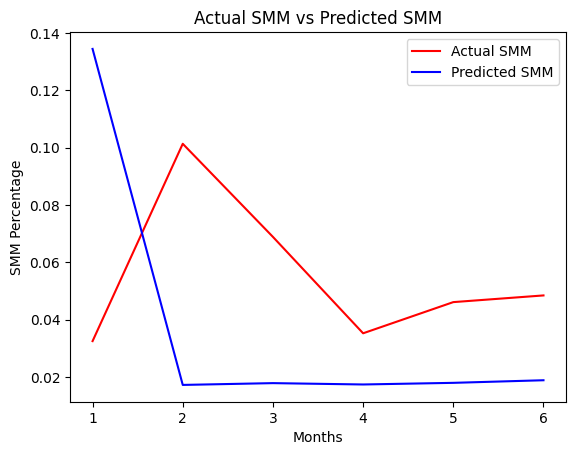

In [85]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 7) 

act_smm=np.asarray(actual_smm)
pred_smm=np.asarray(predicted_smm)



plt.plot(months, act_smm[:6]*100, label='Actual SMM',color='red')
plt.plot(months, pred_smm[:6]*100, label='Predicted SMM',color='blue')

plt.xlabel('Months')
plt.ylabel('SMM Percentage')
plt.title('Actual SMM vs Predicted SMM')

# plt.yticks(np.arange(-1,1,0.1))

plt.legend()

plt.show()


In [86]:
pred_smm

array([0.00134431, 0.00017198, 0.00017823, 0.00017353, 0.00017924,
       0.0001883 , 0.00018406])

In [87]:
act_smm

array([0.00032482, 0.00101332, 0.00068843, 0.00035214, 0.00046091,
       0.00048422, 0.00548043])

In [88]:
act_smm-pred_smm

array([-0.00101949,  0.00084134,  0.0005102 ,  0.00017861,  0.00028167,
        0.00029593,  0.00529637])

In [89]:
actual_smm
for i in range(len(actual_smm)):
    # if actual_smm[i]<0:
    #     actual_smm[i]=0
    actual_smm[i]=actual_smm[i]

In [90]:
predicted_smm
for i in range(len(predicted_smm)):
    # if predicted_smm[i]<0:
    #     predicted_smm[i]=0
    predicted_smm[i]=predicted_smm[i]

predicted_smm

[0.0013443108572380323,
 0.00017197927175393018,
 0.00017822744816502312,
 0.00017352676836005312,
 0.0001792434885084262,
 0.00018829895246291856,
 0.00018406020492322788]

In [91]:
actual_cpr=[]
predicted_cpr=[]


for i in range(7):
    acpr=1-pow(1-act_smm[i],12)
    pcpr=1-pow(1-pred_smm[i],12)

    actual_cpr.append(acpr)
    predicted_cpr.append(pcpr)
    

In [92]:
for i in range(len(li2)):
    print(i+1)
    for j in range(len(li2[0])):
        print(li2[i][j]-actual_list_upb[i][j])
    print('\n')

1
-505.921875
-1015.015625
-1125.9731249999895
498.6856250000128
417.398749999993
330.8862500000105
264.538750000007


2
312.09375
68.98125000001164
133.31374999997206
194.97625000000698
252.65625
305.8637500000186
357.26500000001397


3
-207.421875
-61.44999999999709
-5.283750000002328
50.54937500000233
132.97687499999302
214.9228124999936
295.9731250000041


4
-297.359375
59.758124999993015
383.054999999993
80.58624999999302
90.87625000000116
100.99499999999534
110.75500000000466


5
462.34375
-79.5625
22.888749999983702
26.071249999979045
25.973750000004657
24.53375000000233
20.37624999997206


6
-317.875
-813.320624999993
-549.7868749999907
-873.4743749999907
-610.0050000000047
-936.5050000000047
-972.0325000000012


7
4160.8125
4296.493750000023
6469.538750000007
6639.816249999974
10804.023749999993
10970.546250000014
14163.487499999988


8
-56.1875
-505.0074999999488
-585.125
-664.1524999999674
-743.3824999999488
-817.9399999999441
-886.7524999999441


9
-48.82250000000931
-454.4

In [93]:
actual_cpr

[0.003890870764686527,
 0.012092279107843495,
 0.008229926011852129,
 0.004217517881085264,
 0.005516929087345135,
 0.00579524536770315,
 0.06381864880703791]

In [94]:
predicted_cpr

[0.01601298981089716,
 0.0020618003062540247,
 0.00213663413145182,
 0.00208033500781013,
 0.002148802665461247,
 0.0022572487690433185,
 0.0022064878718509595]

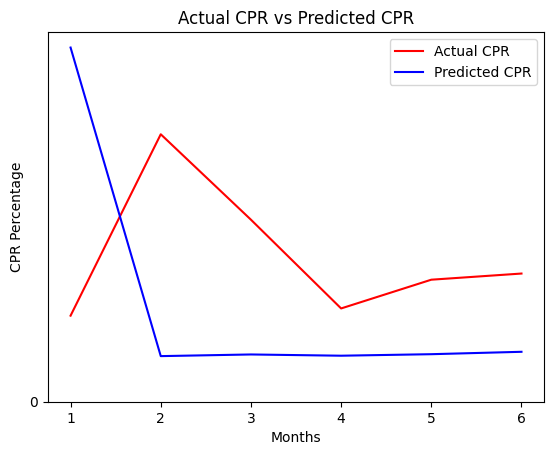

In [95]:
months = np.arange(1, 7) 

act_cpr=np.asarray(actual_cpr)
pred_cpr=np.asarray(predicted_cpr)

# act_cpr=act_cpr*100
# pred_cpr=pred_cpr*100

plt.plot(months, act_cpr[:6]*100, label='Actual CPR',color='red')
plt.plot(months, pred_cpr[:6]*100, label='Predicted CPR',color='blue')

plt.xlabel('Months')
plt.ylabel('CPR Percentage')
plt.title('Actual CPR vs Predicted CPR')

plt.yticks(np.arange(0,1,1))

plt.legend()

plt.show()

In [103]:
np.mean(act_cpr)

0.014794488146793374

In [104]:
np.mean(pred_cpr)

0.0041291855089669515

In [96]:
actual_rolling_cpr=[]
predicted_rolling_cpr=[]

for i in range(len(act_smm)):
    k=1
    for j in range(i+1):
        k=k*(1-act_smm[j])

    val=1-pow(k,12/(i+1))
    actual_rolling_cpr.append(val)

for i in range(len(pred_smm)):
    k=1
    for j in range(i+1):
        k=k*(1-pred_smm[j])

    val=1-pow(k,12/(i+1))
    predicted_rolling_cpr.append(val)

In [97]:
actual_rolling_cpr

[0.003890870764686527,
 0.008000050593383934,
 0.008076681652398054,
 0.007113295124617447,
 0.006794227050650803,
 0.006627799837799153,
 0.015007003711249634]

In [98]:
predicted_rolling_cpr

[0.01601298981089716,
 0.0090619467039601,
 0.006758866013019893,
 0.0055912936283358805,
 0.004903746850459356,
 0.004463151826405443,
 0.004141084008183693]

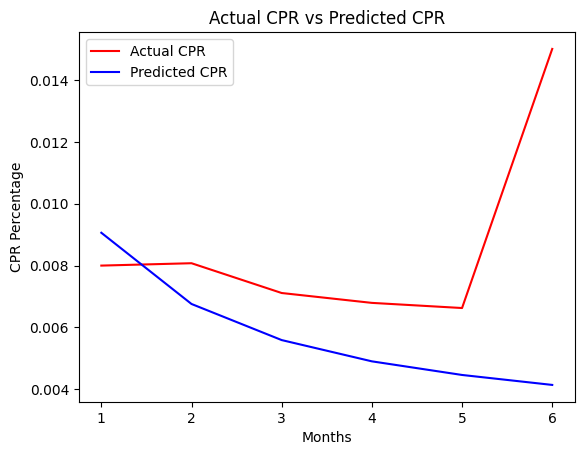

In [99]:
months = np.arange(1, 7) 

actual_rolling_cpr=np.asarray(actual_rolling_cpr)
predicted_rolling_cpr=np.asarray(predicted_rolling_cpr)

# act_cpr=act_cpr*100
# pred_cpr=pred_cpr*100

plt.plot(months, actual_rolling_cpr[1:], label='Actual CPR',color='red')
plt.plot(months, predicted_rolling_cpr[1:], label='Predicted CPR',color='blue')

plt.xlabel('Months')
plt.ylabel('CPR Percentage')
plt.title('Actual CPR vs Predicted CPR')

# plt.yticks(np.arange(0, 0.1,0.01))

plt.legend()

plt.show()

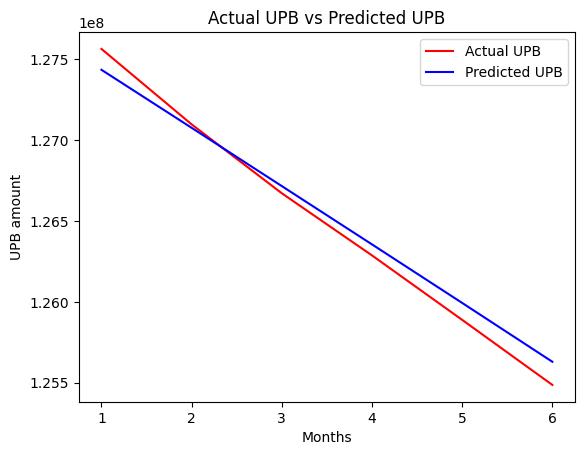

In [100]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1,7) 

act_smm=np.asarray(actual_smm)
pred_smm=np.asarray(predicted_smm)

act_smm=act_smm*100
pred_smm=pred_smm*100

plt.plot(months, monthly_cupb[:6], label='Actual UPB',color='red')
plt.plot(months, sum_list[:6], label='Predicted UPB',color='blue')

plt.xlabel('Months')
plt.ylabel('UPB amount')
plt.title('Actual UPB vs Predicted UPB')

# plt.yticks(np.arange(0, 10000000, 1000))

plt.legend()

plt.show()


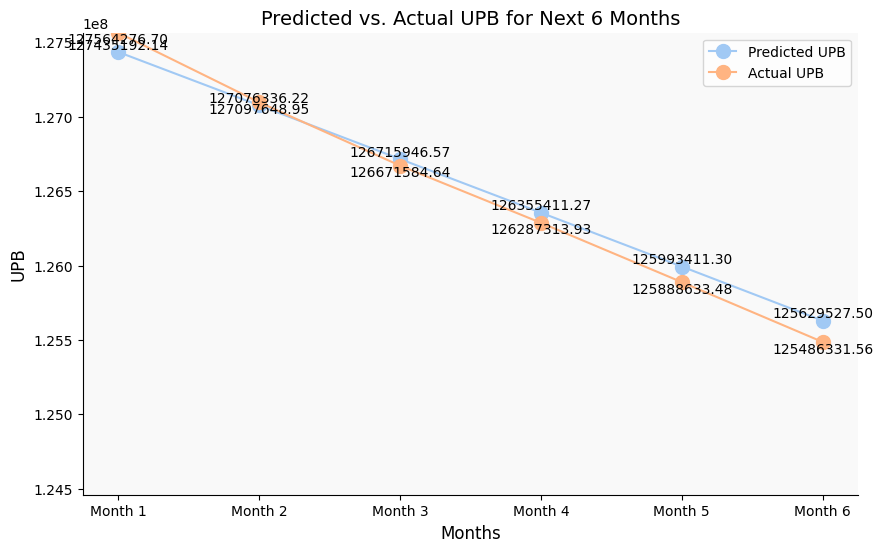

In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the next 7 months
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6']

# Generating colors for the plot
colors = sns.color_palette('pastel')[0:2]

# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the predicted and actual UPB values
ax.plot(months, sum_list[:6], marker='o', markersize=10, linestyle='-', color=colors[0], label='Predicted UPB')
ax.plot(months, monthly_cupb[:6], marker='o', markersize=10, linestyle='-', color=colors[1], label='Actual UPB')

# Adding value annotations for predicted UPB
for i in range(len(months)):
    ax.text(i, sum_list[i], f'{sum_list[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding value annotations for actual UPB
for i in range(len(months)):
    ax.text(i, monthly_cupb[i], f'{monthly_cupb[i]:.2f}', ha='center', va='top', fontsize=10)

# Customizing the plot aesthetics
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('UPB', fontsize=12)
ax.set_title('Predicted vs. Actual UPB for Next 6 Months', fontsize=14)
ax.legend(fontsize=10)

# Adjusting the y-axis limits
ax.set_ylim([min(np.min(sum_list), np.min(monthly_cupb)) - 100, max(np.max(sum_list), np.max(monthly_cupb)) + 100])

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a background color to the plot
ax.set_facecolor('#F9F9F9')

# Showing the plot
plt.show()


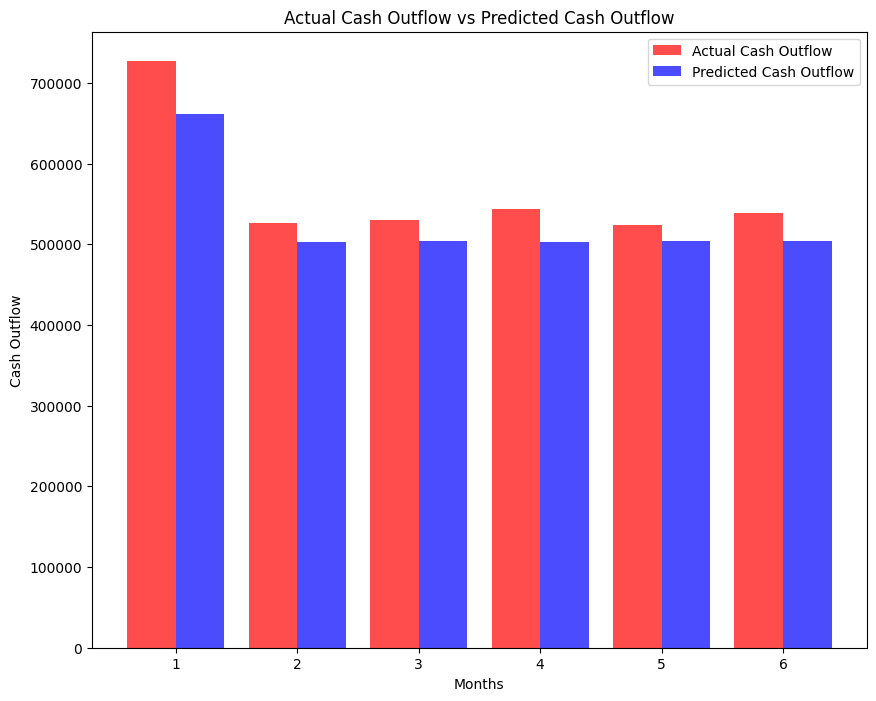

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 7)
bar_width = 0.4  # Width of each bar

plt.figure(figsize=(10,8))

plt.bar(months - bar_width/2, act_emi[:6], label='Actual Cash Outflow', color='red', width=bar_width, alpha=0.7)
plt.bar(months + bar_width/2, pred_emi[:6], label='Predicted Cash Outflow', color='blue', width=bar_width, alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Cash Outflow')
plt.title('Actual Cash Outflow vs Predicted Cash Outflow')

plt.legend()
plt.show()


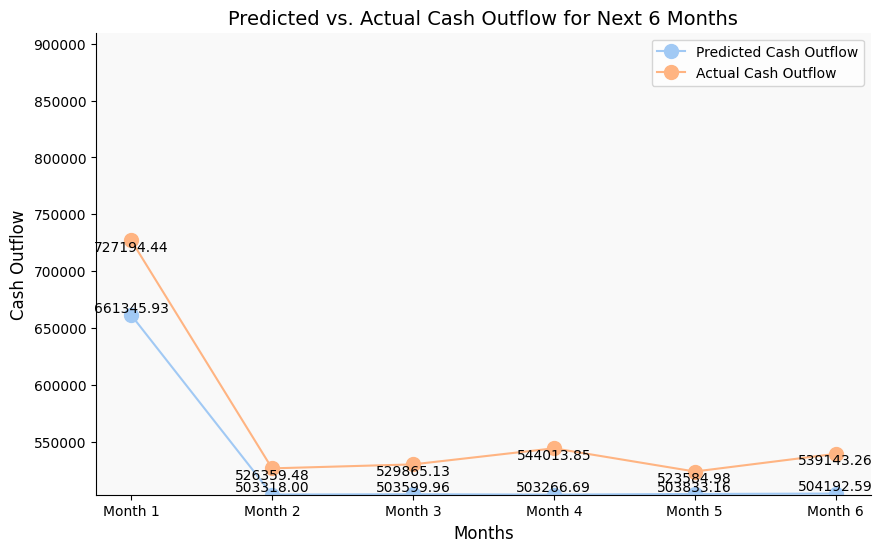

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the next 7 months
months = ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6']

# Generating colors for the plot
colors = sns.color_palette('pastel')[0:2]

# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the predicted and actual Cash Outflow values
ax.plot(months, pred_emi[:6], marker='o', markersize=10, linestyle='-', color=colors[0], label='Predicted Cash Outflow')
ax.plot(months, act_emi[:6], marker='o', markersize=10, linestyle='-', color=colors[1], label='Actual Cash Outflow')

# Adding value annotations for predicted Cash Outflow
for i in range(len(months)):
    ax.text(i, pred_emi[i], f'{pred_emi[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Adding value annotations for actual Cash Outflow
for i in range(len(months)):
    ax.text(i, act_emi[i], f'{act_emi[i]:.2f}', ha='center', va='top', fontsize=10)

# Customizing the plot aesthetics
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Cash Outflow', fontsize=12)
ax.set_title('Predicted vs. Actual Cash Outflow for Next 6 Months', fontsize=14)
ax.legend(fontsize=10)

# Adjusting the y-axis limits
ax.set_ylim([min(np.min(pred_emi), np.min(act_emi)) - 100, max(np.max(pred_emi), np.max(act_emi)) + 100])

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding a background color to the plot
ax.set_facecolor('#F9F9F9')

# Showing the plot
plt.show()


In [ ]:
act_emi

[727194.4409166591,
 526359.4819787804,
 529865.125821566,
 544013.8508631521,
 523584.97636969143,
 539143.2585673628,
 909673.200851606]

In [ ]:
pred_emi

[661345.9344959557,
 503318.0019919697,
 503599.95661703474,
 503266.6854730213,
 503833.16283418646,
 504192.5891889781,
 503884.8481840596]

In [ ]:
for i in range(6):
    print(sum_list[i]-sum_list[i+1])

239465.28515625
240312.77734375
240545.44921875
241680.609375
242610.8984375
242874.55859375


In [ ]:
for i in range(6):
    print(monthly_cupb[i]-monthly_cupb[i+1])

264660.7199999094
268789.3299999535
283566.0900001228
263803.61999987066
279981.49000015855
652046.1899998933


In [ ]:
for i in range(6):
    print(monthly_cupb[i]-sum_list[i])

-67565.53781250119
-92760.9726561606
-121237.5253123641
-164258.1660937369
-186381.17671860754
-223751.7682812661


In [ ]:
monthly_cupb

[105586100.97,
 105321440.25000009,
 105052650.92000014,
 104769084.83000001,
 104505281.21000014,
 104225299.71999998,
 103573253.53000009]

In [ ]:
sum_list

[105653666.5078125,
 105414201.22265625,
 105173888.4453125,
 104933342.99609375,
 104691662.38671875,
 104449051.48828125,
 104206176.9296875]

In [ ]:
len(test_pool['Original UPB'])
# test_pool

354

In [ ]:
def_act=[]

for i in range(7):
    default=0

    for j in range(len(actual_list_smm)):
        if actual_list_smm[j][i]<0:
            default=default+1
    
    def_act.append(default)

def_act

[172, 180, 139, 132, 148, 142, 131]

In [ ]:
def_pred=[]

for j in range(7):
    default=0

    for j in range(len(predicted_list_smm)):
        if predicted_list_smm[j][i]<0:
            default=default+1

    def_pred.append(default)

def_pred

[181, 181, 181, 181, 181, 181, 181]

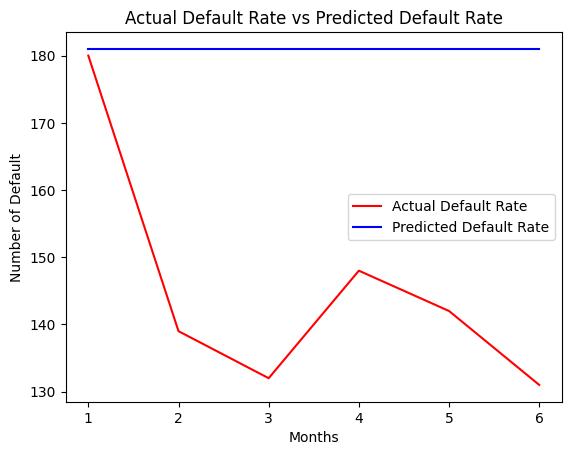

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1, 7) 

plt.plot(months, def_act[1:], label='Actual Default Rate',color='red')
plt.plot(months, def_pred[1:], label='Predicted Default Rate',color='blue')

plt.xlabel('Months')
plt.ylabel('Number of Default')
plt.title('Actual Default Rate vs Predicted Default Rate')

# plt.yticks(np.arange(0, 1000000, 10000))

plt.legend()

plt.show()


In [ ]:
li3=[]

for i in li2:
    li3=li3+i

In [ ]:
li3

[590172.6,
 589339.25,
 588492.8,
 587634.3,
 586767.75,
 585923.44,
 585069.0,
 561215.8,
 560427.9,
 559634.2,
 558827.8,
 558010.6,
 557186.56,
 556389.44,
 144774.06,
 144547.19,
 144346.64,
 144145.03,
 143941.95,
 143737.92,
 143531.42,
 613128.25,
 612248.56,
 611365.25,
 610476.8,
 609582.7,
 608684.44,
 607782.44,
 385779.0,
 384549.4,
 383311.62,
 382094.6,
 380869.38,
 379635.66,
 378394.06,
 144295.64,
 143585.2,
 142868.77,
 142145.28,
 141415.02,
 140677.98,
 139933.7,
 805718.44,
 804438.0,
 803155.44,
 801869.5,
 800587.2,
 799305.94,
 798025.2,
 327489.94,
 327007.84,
 326521.84,
 326031.3,
 325538.3,
 325041.53,
 324540.4,
 156646.2,
 156288.19,
 155925.86,
 155559.23,
 155188.22,
 154812.75,
 154432.78,
 396238.25,
 395470.47,
 394728.22,
 393979.53,
 393223.9,
 392463.22,
 391696.22,
 163544.53,
 163112.95,
 162677.84,
 162238.81,
 161797.33,
 161353.11,
 160906.31,
 318605.9,
 318210.22,
 317811.7,
 317409.72,
 317007.1,
 316602.8,
 316196.56,
 277800.22,
 277597.2

In [ ]:
li3

[590172.6,
 589339.25,
 588492.8,
 587634.3,
 586767.75,
 585923.44,
 585069.0,
 561215.8,
 560427.9,
 559634.2,
 558827.8,
 558010.6,
 557186.56,
 556389.44,
 144774.06,
 144547.19,
 144346.64,
 144145.03,
 143941.95,
 143737.92,
 143531.42,
 613128.25,
 612248.56,
 611365.25,
 610476.8,
 609582.7,
 608684.44,
 607782.44,
 385779.0,
 384549.4,
 383311.62,
 382094.6,
 380869.38,
 379635.66,
 378394.06,
 144295.64,
 143585.2,
 142868.77,
 142145.28,
 141415.02,
 140677.98,
 139933.7,
 805718.44,
 804438.0,
 803155.44,
 801869.5,
 800587.2,
 799305.94,
 798025.2,
 327489.94,
 327007.84,
 326521.84,
 326031.3,
 325538.3,
 325041.53,
 324540.4,
 156646.2,
 156288.19,
 155925.86,
 155559.23,
 155188.22,
 154812.75,
 154432.78,
 396238.25,
 395470.47,
 394728.22,
 393979.53,
 393223.9,
 392463.22,
 391696.22,
 163544.53,
 163112.95,
 162677.84,
 162238.81,
 161797.33,
 161353.11,
 160906.31,
 318605.9,
 318210.22,
 317811.7,
 317409.72,
 317007.1,
 316602.8,
 316196.56,
 277800.22,
 277597.2

In [ ]:
li4=np.asarray(li4)
li3=np.asarray(li3)
li5=abs(li4-li3)
li5.mean()

ValueError: operands could not be broadcast together with shapes (2492,) (2478,) 

In [ ]:
pre_upb=np.sum(li4)
cur_upb=np.sum(li3)

In [ ]:
pre_upb

61445029.64

In [ ]:
cur_upb

61443110.0

In [ ]:
(cur_upb-pre_upb)/pre_upb

-3.12090336880924e-05

In [ ]:
len(li4[0:31])

31

In [ ]:
test_pool[0:5]

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,82021,2,3.000,3.000,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.0,353
7,72021,2,2.875,2.875,566000.0,561000.00,360,12021,32021,57,...,0.0,0.0,0,3,1,5.3,2.5,5.4,562000.0,354
14,122021,0,3.300,3.300,330000.0,327000.00,360,52021,72021,80,...,0.0,0.0,0,0,0,5.3,2.5,7.0,328000.0,353
21,112021,1,2.750,2.750,401000.0,395938.66,360,32021,52021,67,...,0.0,0.0,0,3,0,5.3,2.5,6.8,397000.0,352
28,102021,2,2.990,2.990,384000.0,381000.00,360,42021,62021,80,...,0.0,0.0,0,0,0,5.3,2.5,6.2,381000.0,354


In [ ]:
(testing_x)

NameError: name 'testing_x' is not defined

In [ ]:
testing_x[0]

array([-1.02954984,  0.84383406, -1.55350925, -1.31814191,  3.66609448,
        0.60030419, -1.61128169, -1.01986277,  0.19222231,  0.34209664,
        0.81302176, -0.42491108,  1.32517563,  0.48097901, -0.15472204,
        0.08211211, -0.53040637,  0.90130701, -0.39673819, -0.12827818,
       -0.1805408 , -0.11415215, -0.16041107, -0.15799407,  9.77825071,
       -0.33494945, -1.22110499,  0.08337639,  3.88398382,  0.96277591])

In [ ]:
fore=[]

p=testing_x[0]
pre=p[28]
single_entry = np.expand_dims(p, axis=0)

In [ ]:
for i in range(6): 
    # print(i)   
    g=model.predict(single_entry)
    fore.append(g[0][0])

    print(g[0][0])

    test_unscaled['Previous_UPB']=g[0][0]
    test_unscaled['Monthly Reporting Period']=update(int(test_unscaled['Monthly Reporting Period']))
    k=str(int(test_unscaled['Monthly Reporting Period']))
    k=k[::-1]
    r=k[:4]

    r=r[::-1]
    print(r)

    if(k=="52023"):
        print("done")
        break
    
    test_unscaled['Unemployment_rate']=Unemploy[r]
    test_unscaled['Divorce_rate']=divorce[r]
    test_unscaled['Inflation_rate']=inflation_data[str(int(test_unscaled['Monthly Reporting Period']))]
    test_unscaled['Remaining MFM']=int(test_unscaled['Remaining MFM'])-1

    # l=single_entry[0]
    # l[-1]=scale(l[-1]-1,29)
    # print(l[0])
    # l[0]=update(l[0])
    # print(l[0])
    
    # print(k)
    # l[25]=Unemploy[r]
    # l[25]=scale(l[25],25)
    # # l[-1]=(l[-1]-1-270.868240)/90.489321
    # # l[0]=(update(l[0])-67492.295858)/34497.797429	
    # l[28]=scale(g, scl.mean_[28], scl.scale_[28])
    # l[0]=scale(l[0],0)

    # print(test_unscaled)
    
    test_scaled=(scl.transform(test_unscaled))[0]
    single_entry = np.expand_dims(test_scaled, axis=0)

1/1 [==============================] - 0s 25ms/step
596653.2
2021
1/1 [==============================] - 0s 23ms/step
596030.1
2021
1/1 [==============================] - 0s 28ms/step
595358.56
2021
1/1 [==============================] - 0s 25ms/step
594685.25
2021
1/1 [==============================] - 0s 28ms/step
594009.0
2021
1/1 [==============================] - 0s 57ms/step
593329.4
2021


In [ ]:
fore

[596653.2, 596030.1, 595358.56, 594685.25, 594009.0, 593329.4]

In [ ]:
# def update(mrp):
#     new_mrp = int(mrp)
#     if((new_mrp//10000)==12):
#         new_mrp = new_mrp - 110000 + 1
#     else:
#         new_mrp += 10000
#     return new_mrp
# print(update('122002'))

In [ ]:
test1_y

NameError: name 'test1_y' is not defined

In [ ]:
for i in range(len(fore)):
    print(fore[i]-test1_y[i])

-346.8125
30.125
358.5625
685.25
2009.0
2329.375


In [ ]:
# X_train_1.describe()

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),Debt-To-Income (DTI),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
count,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,...,804139.000000,804139.000000,804139.000000,804139.000000,804139.000000,804139.00000,804139.000000,804139.000000,804139.000000,804139.000000
mean,67492.295858,1.398669,5.112216,4.983585,187677.681346,312.137781,67319.894812,66955.339365,71.578742,34.126307,...,0.051592,0.018257,0.046860,3.242918,0.010346,5.93966,3.128324,2.439492,170358.980081,270.868240
std,34497.797429,0.713811,1.361030,1.504040,111821.292224,79.729861,34307.612765,34256.668292,17.715732,11.308050,...,0.287244,0.160058,0.292056,1.543653,0.101190,1.90471,0.514733,1.920493,110003.999783,90.489321
min,12000.000000,0.000000,1.750000,0.000000,10000.000000,96.000000,11999.000000,12000.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.60000,2.300000,-2.100000,0.000000,-62.000000
25%,42002.000000,1.000000,4.000000,4.000000,104000.000000,240.000000,42001.000000,42001.000000,62.000000,26.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,4.40000,2.700000,1.400000,88485.830000,191.000000
50%,72003.000000,2.000000,4.875000,4.875000,161000.000000,360.000000,62020.000000,72000.000000,76.000000,35.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,5.30000,3.200000,2.100000,145000.000000,314.000000
75%,102002.000000,2.000000,6.125000,6.000000,248000.000000,360.000000,102000.000000,92019.000000,80.000000,42.000000,...,0.000000,0.000000,0.000000,4.000000,0.000000,8.10000,3.600000,3.000000,227768.860000,342.000000
max,122022.000000,2.000000,9.875000,9.875000,813000.000000,360.000000,122020.000000,122020.000000,97.000000,64.000000,...,2.000000,7.000000,2.000000,4.000000,1.000000,9.60000,4.000000,9.100000,813000.000000,360.000000


In [ ]:
test1=pd.read_csv('test1.csv')
test1

,Loan Identifier,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,...,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,EMI,UPB_diff,Interest_Component,Previous_UPB,Remaining MFM
0,122752190,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,...,3,1,5.3,2.5,1.7,2516.976081,0.00,1492.5,597000.00,359
1,122752190,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,...,3,1,5.3,2.5,2.6,2516.976081,1000.00,1492.5,597000.00,358
2,122752190,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,...,3,1,5.3,2.5,4.2,2516.976081,1000.00,1492.5,596000.00,357
3,122752190,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,...,3,1,5.3,2.5,5.0,2516.976081,1000.00,1492.5,595000.00,356
4,122752190,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,2000.00,1492.5,594000.00,355
5,122752190,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,1000.00,1492.5,592000.00,354
6,122752190,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,...,3,1,5.3,2.5,5.3,2516.976081,1000.00,1492.5,591000.00,353
7,122752190,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,...,3,1,5.3,2.5,5.4,2516.976081,880.38,1492.5,590000.00,352
8,122752190,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,...,3,1,5.3,2.5,6.2,2516.976081,1115.41,1492.5,589119.62,351
9,122752190,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,...,3,1,5.3,2.5,6.8,2516.976081,1118.20,1492.5,588004.21,350


In [ ]:
test1.drop(['Loan Identifier','EMI','UPB_diff','Interest_Component','Remaining Months To Maturity'], axis=1, inplace = True)
test1

,Monthly Reporting Period,Channel,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Origination Date,First Payment Date,Original Loan to Value Ratio (LTV),...,Modification Flag,Zero Balance Code,Special Eligibility Program,Property Valuation Method,High Balance Loan Indicator,Unemployment_rate,Divorce_rate,Inflation_rate,Previous_UPB,Remaining MFM
0,22021,2,3.0,3.0,597000.0,597000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,1.7,597000.00,359
1,32021,2,3.0,3.0,597000.0,596000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,2.6,597000.00,358
2,42021,2,3.0,3.0,597000.0,595000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,4.2,596000.00,357
3,52021,2,3.0,3.0,597000.0,594000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.0,595000.00,356
4,62021,2,3.0,3.0,597000.0,592000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,594000.00,355
5,72021,2,3.0,3.0,597000.0,591000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,592000.00,354
6,82021,2,3.0,3.0,597000.0,590000.00,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.3,591000.00,353
7,92021,2,3.0,3.0,597000.0,589119.62,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,5.4,590000.00,352
8,102021,2,3.0,3.0,597000.0,588004.21,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.2,589119.62,351
9,112021,2,3.0,3.0,597000.0,586886.01,360,12021,32021,75,...,0.0,0.0,0,3,1,5.3,2.5,6.8,588004.21,350


In [ ]:
test1_x=test1.drop(['Current Actual UPB'],axis=1)

In [ ]:
test1_y=test1['Current Actual UPB']

In [ ]:
test1_x=scl.transform(test1_x)

In [ ]:
pred=model.predict(test1_x)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test1_y

0     597000.00
1     596000.00
2     595000.00
3     594000.00
4     592000.00
5     591000.00
6     590000.00
7     589119.62
8     588004.21
9     586886.01
10    585765.02
11    584641.22
12    583514.61
13    582385.19
14    581252.94
15    580117.86
16    578979.94
17    577839.18
18    576695.57
19    575549.10
20    574399.76
21    573247.55
22    572092.46
Name: Current Actual UPB, dtype: float64

In [ ]:
pred

array([[596774.4 ],
       [596653.2 ],
       [595325.6 ],
       [594324.7 ],
       [593321.9 ],
       [591314.1 ],
       [590309.5 ],
       [589305.75],
       [588424.25],
       [587306.2 ],
       [586184.06],
       [585077.25],
       [583952.9 ],
       [582826.2 ],
       [581694.5 ],
       [580561.4 ],
       [579425.94],
       [578283.75],
       [577137.6 ],
       [575989.06],
       [574836.25],
       [573680.2 ],
       [572521.3 ]], dtype=float32)

In [ ]:
mean_absolute_error(pred,test1_y)

443.084673913054

In [ ]:
for i in range(len(pred)):
    print(pred[i]-test1_y[i])

[-225.625]
[653.1875]
[325.625]
[324.6875]
[1321.875]
[314.125]
[309.5]
[186.125]
[420.0625]
[420.1875]
[419.0625]
[436.]
[438.25]
[441.]
[441.5625]
[443.5]
[446.]
[444.5625]
[442.0625]
[439.9375]
[436.5]
[432.625]
[428.875]


In [ ]:
list(df['UPB_diff'])

[1129.42,
 1132.25,
 1135.08,
 1137.92,
 1140.76,
 1143.61,
 1146.47,
 1021.16,
 1023.61,
 1026.06,
 1028.52,
 1030.99,
 1033.46,
 1035.93,
 764.52,
 766.35,
 768.18,
 770.02,
 771.87,
 773.72,
 775.57,
 1000.0,
 1000.0,
 1000.0,
 1504.25,
 1082.75,
 1085.44,
 1088.15,
 269.98,
 270.59,
 271.21,
 271.84,
 272.46,
 273.08,
 273.71,
 524.09,
 525.56,
 527.03,
 528.51,
 529.99,
 531.47,
 532.96,
 550.36,
 551.87,
 553.39,
 554.91,
 556.44,
 557.97,
 559.5,
 2000.0,
 2000.0,
 2000.0,
 1618.93,
 1986.07,
 1990.41,
 1994.77,
 734.72,
 736.4,
 738.09,
 739.78,
 741.48,
 743.18,
 744.88,
 496.38,
 497.78,
 499.18,
 500.58,
 501.99,
 503.4,
 504.82,
 376.09,
 377.25,
 378.21,
 379.03,
 380.18,
 381.17,
 382.0,
 1235.03,
 1237.48,
 1239.93,
 1242.38,
 1244.84,
 1247.3,
 1249.77,
 294.53,
 641.83,
 643.57,
 645.31,
 647.06,
 648.81,
 650.57,
 1327.35,
 1330.4,
 1333.45,
 2409.31,
 1342.02,
 1345.1,
 1348.18,
 1228.1,
 1230.14,
 1232.18,
 1234.22,
 1236.27,
 1238.32,
 1240.37,
 2000.0,
 1000.0,
 1

In [ ]:
import numpy as np

# Original predictions from your model
original_predictions = np.array([200, 300, 400, 500])

# Growth rate adjustment factor
growth_rate = 0.01

# Compute adjusted predictions using exponential growth
adjusted_predictions = original_predictions * (1/np.exp(growth_rate))

# Print the adjusted predictions
print("Adjusted Predictions:", adjusted_predictions)


Adjusted Predictions: [198.00996675 297.01495012 396.0199335  495.02491687]
